In [53]:
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import pickle as pk
import numpy as np

# These are the JK results
filen='/global/cfs/cdirs/des/shivamp/nl_cosmosis/cosmosis/ACTxDESY3/src/data/results_25_6_20.pkl'
filen='/global/cscratch1/sd/aamon/Y3data_sompz_redmagic_v0.40_bothw_180720/2pt/shear_shear_pixellized.pkl'
try:
    df = pk.load(open(filen,'rb'))
except:
    df = pk.load(open(filen,'rb'),encoding='latin1')


from astropy.io import fits
des_theory = fits.open('/global/cscratch1/sd/aamon/y3-3x2pt-methods/cosmosis/data_vectors/2pt_NG_BLINDED_Aug20cov_xcorrGGL_27072020_SOMPZWZsamples_pit.fits')

nbins = 4
bins1 = np.array([1,2,3,4,5])
bins2 = np.array([1,2,3,4])


In [35]:
np.shape(des_theory['COVMAT'].data)

(900, 900)

No handles with labels found to put in legend.


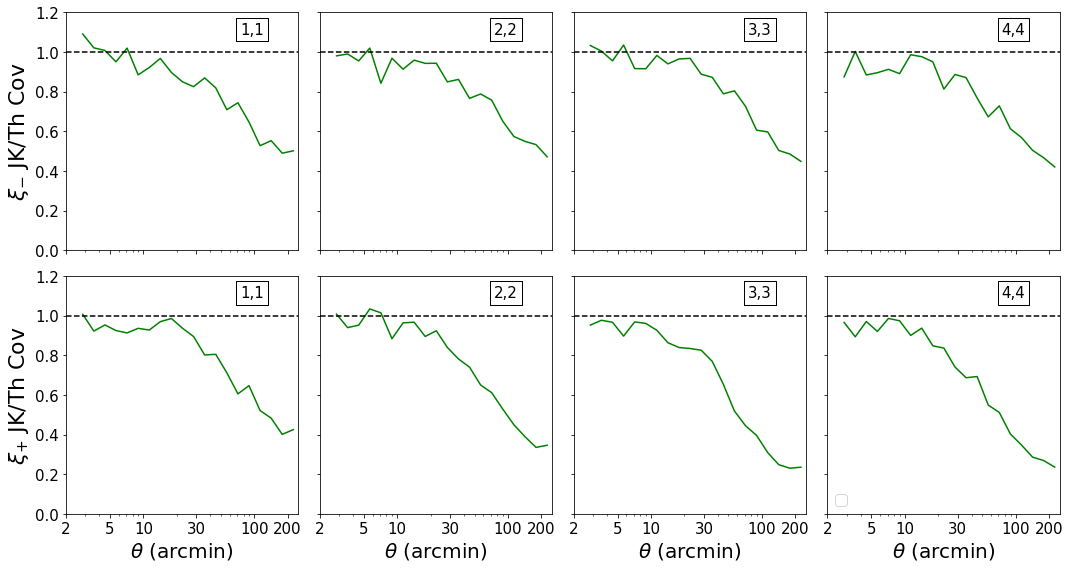

In [36]:
fig, ax = plt.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = []
for j1 in range(len(bins1)):
    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
        
        bin1 = des_theory['xip'].data['BIN1']
        bin2 = des_theory['xip'].data['BIN2']
        
        ind_sel = np.where((bin1 == bins1[j2]) & (bin2 == bins2[j2]))[0]
        if len(ind_sel) == 0:
            ind_sel = np.where((bin1 == bins2[j2]) & (bin2 == bins1[j2]))[0]
        
        if j1 == 0:
            data_ang = des_theory['xim'].data['ANG'][ind_sel]
            cov = des_theory['COVMAT'].data[200:400,200:400][ind_sel,:][:,ind_sel]
            sig = np.sqrt(np.diag(cov))

            try:
                yk_g = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['xim']  
                yk_th_g = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['meanr']
                yk_err = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['cov_xim_jack']['err']
            except:
                yk_g = df[str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['xim']
                yk_err = df[str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['cov_xim_jack']['err']
           
            sig_th_interp = interpolate.interp1d(np.log(data_ang),np.log(sig),fill_value='extrapolate')
            sig_th_jkang = np.exp(sig_th_interp(np.log(yk_th_g)))
            ax[j1,j2].plot(yk_th_g, (yk_err/sig_th_jkang)**2, ls='-',marker='',color='green')            
            
            
        if j1 == 1:
            data_ang = des_theory['xip'].data['ANG'][ind_sel]
            cov = des_theory['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
            sig = np.sqrt(np.diag(cov))


            try:
                yk_err = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['cov_xip_jack']['err']
            except:
                yk_err = df[str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['cov_xip_jack']['err']
            

            sig_th_interp = interpolate.interp1d(np.log(data_ang),np.log(sig),fill_value='extrapolate')
            sig_th_jkang = np.exp(sig_th_interp(np.log(yk_th_g)))
            ax[j1,j2].plot(yk_th_g, (yk_err/sig_th_jkang)**2, ls='-',marker='',color='green')


        ax[j1,j2].set_ylim(0.,1.2)
        ax[j1,j2].axhline(1.0,ls='--',color='k')    
        ax[j1,j2].set_xscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
        ax[j1,j2].set_xlim((2,250))      

        ax[0,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    

        jc += 1

ax[0,0].set_ylabel(r'$\xi_{-}$ JK/Th Cov', size = 22)
ax[1,0].set_ylabel(r'$\xi_{+}$ JK/Th Cov', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
plt.ylim(0.,1.2)
plt.tight_layout()

In [54]:
filen='/global/cscratch1/sd/aamon/Y3data_sompz_redmagic_v0.40_bothw_180720/2pt/shear_pos_pixellized.pkl'
try:
    df = pk.load(open(filen,'rb'))
except:
    df = pk.load(open(filen,'rb'),encoding='latin1')
    
print(df['0_0'].keys())

dict_keys(['logr', 'rnom', 'meanr', 'meanlogr', 'gammat_compens', 'gammat_compens_jack', 'gammat_compens_im', 'gammat_compens_im_jack', 'gammat', 'gammat_jack', 'cov_gammat_jack', 'gammat_rndm', 'gammat_rndm_jack', 'cov_gammat_rndm_jack', 'gammat_im', 'gammat_im_jack', 'cov_gammat_im_jack', 'gammat_im_rndm', 'gammat_im_rndm_jack', 'cov_gammat_im_rndm_jack', 'npairs', 'npairs_rndm', 'weight', 'weight_rndm'])


0 0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
0 1
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
0 2
[40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
0 3
[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
1 0
[80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
1 1
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]
1 2
[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139]
1 3
[140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159]
2 0
[160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179]
2 1
[180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]
2 2
[200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219]
2 3
[220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239]
3 0
[240 241 242 243 244 245 246 247 248 249 250 251 252 253 

(0.8, 1.4)

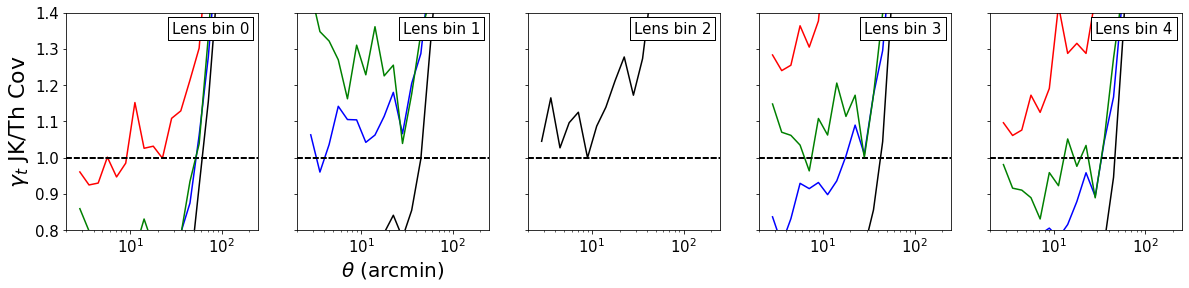

In [56]:
#I SHOULD DO THIS FOR GGL 

fig, ax = plt.subplots(1,5, figsize = (20,4),sharex=True,sharey='row')
jc = 0
texts_kk = []

texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
colours=['r','b','k','g']
for j1 in range(5):    
    for j2 in range(4):
        print(j1,j2)

        bin1 = des_theory['gammat'].data['BIN1']
        bin2 = des_theory['gammat'].data['BIN2']
        
        ### THIS IS WRONG - NEED TO CHECK WHAT INDICES ARE FOR GGL 
        #ind_sel = np.where((bin1 == bins1[j2]) & (bin2 == bins2[j2]))[0]
        ind_sel = np.where((bin1 == bins1[j1]) & (bin2 == bins2[j2]))[0]
        #if len(ind_sel) == 0:
        #    ind_sel = np.where((bin1 == bins2[j2]) & (bin2 == bins1[j2]))[0]
        print(ind_sel)

        data_val = des_theory['gammat'].data['VALUE'][ind_sel]
        data_ang = des_theory['gammat'].data['ANG'][ind_sel]
        cov = des_theory['COVMAT'].data[400:800,400:800][ind_sel,:][:,ind_sel]
        sig = np.sqrt(np.diag(cov))


        try:
            yk_th_g = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['meanr']
            yk_err = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['cov_gammat_jack']['err']
        except:
            yk_err = df[str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['cov_gammat_jack']['err']

            
        sig_th_interp = interpolate.interp1d(np.log(data_ang),np.log(sig),fill_value='extrapolate')
        sig_th_jkang = np.exp(sig_th_interp(np.log(yk_th_g)))
        ax[j1].plot(yk_th_g, (yk_err/sig_th_jkang)**2, ls='-',marker='',color=colours[j2])            
            
        

        ax[j1].set_ylim(0.,1.2)
        ax[j1].axhline(1.0,ls='--',color='k')    
        ax[j1].set_xscale('log')
        
        if j1 == 1:
            ax[j1].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0].set_xticks(ticks)
            ax[0].set_xticklabels(labels_bottom,  fontsize=15)
            #ax[1,j2].set_xticks(ticks)
            #ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1].tick_params(axis='both', which='major', labelsize=15)
        ax[j1].set_xlim((2,250))
        

        ax[j1].text( 0.55, 0.96,'Lens bin %d'%j1, verticalalignment='top', horizontalalignment='left', transform=ax[j1].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1

ax[0].set_ylabel(r'$\gamma_t$ JK/Th Cov', size = 22)
#ax[1,3].legend(fontsize=15,loc='lower left')
plt.ylim(0.8,1.4)
#plt.tight_layout()

In [57]:
filen='/global/cscratch1/sd/aamon/Y3data_sompz_redmagic_v0.40_bothw_180720/2pt/pos_pos_pixellized.pkl'
try:
    df = pk.load(open(filen,'rb'))
except:
    df = pk.load(open(filen,'rb'),encoding='latin1')
    
print(df['0_0'].keys())

dict_keys(['logr', 'rnom', 'meanr', 'meanlogr', 'w', 'w_jack', 'cov_w_jack', 'npairs', 'weight'])


0 0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
0 1
[]


ValueError: cannot reshape array of size 0 into shape (0,newaxis)

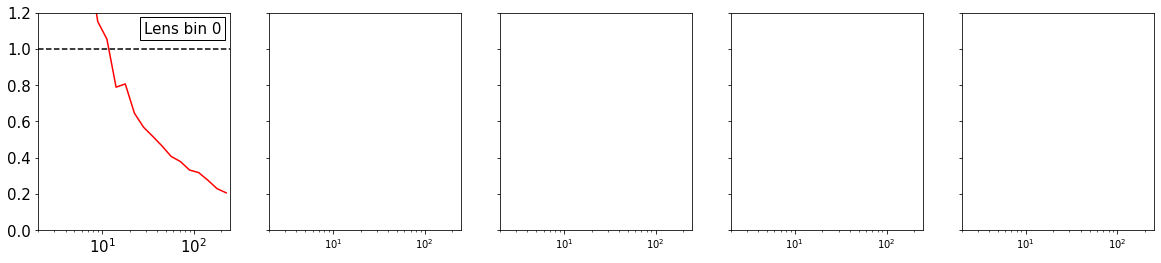

In [61]:
#I SHOULD DO THIS FOR GGL AND WTHETA TOO 

fig, ax = plt.subplots(1,5, figsize = (20,4),sharex=True,sharey='row')
jc = 0
texts_kk = []
#for j1 in range(len(bins1)):
#    texts_kk.append(str(bins1[j1]) + ',' + str(bins2[j1]))
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
colours=['r','b','k','g']
for j1 in range(5):    
    for j2 in range(5):
        print(j1,j2)
        #print(df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)].keys())
        
        bin1 = des_theory['wtheta'].data['BIN1']
        bin2 = des_theory['wtheta'].data['BIN2']
        
        ### THIS IS WRONG - NEED TO CHECK WHAT INDICES ARE FOR GGL 
        #ind_sel = np.where((bin1 == bins1[j2]) & (bin2 == bins2[j2]))[0]
        ind_sel = np.where((bin1 == bins1[j1]) & (bin2 == bins2[j2]))[0]
        #if len(ind_sel) == 0:
        #    ind_sel = np.where((bin1 == bins2[j2]) & (bin2 == bins1[j2]))[0]
        print(ind_sel)

        data_val = des_theory['wtheta'].data['VALUE'][ind_sel]
        data_ang = des_theory['wtheta'].data['ANG'][ind_sel]
        cov = des_theory['COVMAT'].data[800:900,800:900][ind_sel,:][:,ind_sel]
        sig = np.sqrt(np.diag(cov))


        try:
            yk_th_g = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['meanr']
            yk_err = df[str(bins1[j2]-1)+'_'+str(bins2[j2]-1)]['cov_w_jack']['err']
        except:
            yk_err = df[str(bins2[j2]-1)+'_'+str(bins1[j2]-1)]['cov_w_jack']['err']

            
        sig_th_interp = interpolate.interp1d(np.log(data_ang),np.log(sig),fill_value='extrapolate')
        sig_th_jkang = np.exp(sig_th_interp(np.log(yk_th_g)))
        ax[j1].plot(yk_th_g, (yk_err/sig_th_jkang)**2, ls='-',marker='',color=colours[j2])            
            
        

        ax[j1].set_ylim(0.,1.2)
        ax[j1].axhline(1.0,ls='--',color='k')    
        ax[j1].set_xscale('log')
        
        if j1 == 1:
            ax[j1].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0].set_xticks(ticks)
            ax[0].set_xticklabels(labels_bottom,  fontsize=15)
            #ax[1,j2].set_xticks(ticks)
            #ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1].tick_params(axis='both', which='major', labelsize=15)
        ax[j1].set_xlim((2,250))
        

        ax[j1].text( 0.55, 0.96,'Lens bin %d'%j1, verticalalignment='top', horizontalalignment='left', transform=ax[j1].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    


        jc += 1

ax[0].set_ylabel(r'$w_\{theta}$ JK/Th Cov', size = 22)
#ax[1,3].legend(fontsize=15,loc='lower left')
plt.ylim(0.8,1.4)
#plt.tight_layout()